<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Modern_OCR_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q requests

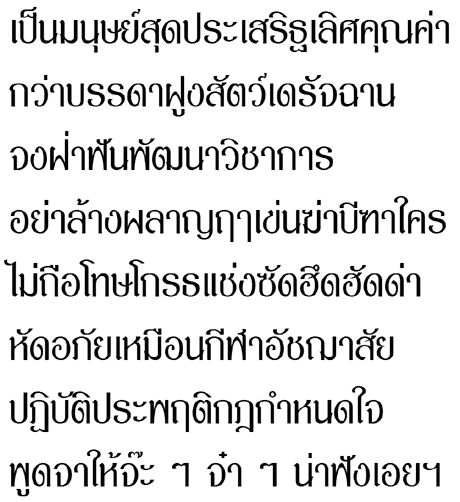

In [ ]:
import cv2
from PIL import Image
from io import BytesIO
import requests

url = 'https://camo.githubusercontent.com/c968bd02d4d52e5f61356d7602b5d5506a4824f3211a9569e27589bd26e0f6b5/68747470733a2f2f6769746875622e636f6d2f6d726f6c6172696b2f5465737365726163742d546861692f7261772f6d61737465722f646174612d746578742d696d672f746861692d746578742e706e67'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image.convert('RGB').save('thai_text.jpg')
image


# Tesseract

In [ ]:
! pip install -q pytesseract
! apt install -qq tesseract-ocr tesseract-ocr-tha

The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-tha
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,715 kB of archives.
After this operation, 16.7 MB of additional disk space will be used.
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr-osd.
Preparing to unpack .../tesseract-ocr-osd_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr.
Preparing to unpack .../tesseract-ocr_4.1.1-2.1build1_amd64.deb ...
Unpacking tesseract-ocr (4.1.1-2

In [ ]:
import pytesseract

output_tesseract = pytesseract.image_to_string(image, lang='tha')
print(output_tesseract)

เป็นมนุษย์สุดประเสริฐเลิศคุณค่า
กว่าบธรดาฝูงสัตว์เดรังฉาน

ออฟ่าพันพัฒนาวิชาการ

อยําล้างพลาญฤาเข่นฆ่าบีทาใคร
ไม่ถือโทษโกรธแช่งชัดฮิดฮัดด่า
หัดอภัยเหมือนกีฬาอัชญฒาสัย

ปฏิบัติประพฤติกฎกําหนดใจ

พูดอาให้จ๊ะ ฯ อํา ฯ น่าฟังเอยฯ



# EasyOCR


In [ ]:
! pip install -q easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 35.8 MB/s eta 0:00:00


In [ ]:
import easyocr
reader = easyocr.Reader(['th']) # this needs to run only once to load the model into memory
result = reader.readtext('/content/thai_text.jpg')
[item[1] for item in result]

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

['เป็นมนุษย์สุดประเสริฐเลิศคุณค่า',
 'กว่าบรรดาฝูงสัตว์เดรัจฉาน',
 'จงฝ่าฟันพัฒนาวิชาการ',
 'อย่าล้างผลาญฎาเข่นฆ่าบีทาใคร',
 'ไม่ถือโทษโกรธแช่งซัดฮึดฮัดด่า',
 'หัดอภัยเหมือนกีฬาอัชฌาลัย',
 'ปฏิบัติประพกติกฎกำหนดใจ',
 'พูดอาให้จ๊ะจ จำไน่าฟังเอยฯ']

In [ ]:
result

[([[0, 0], [457, 0], [457, 63], [0, 63]],
  'เป็นมนุษย์สุดประเสริฐเลิศคุณค่า',
  0.8686488433049642),
 ([[0, 64], [403, 64], [403, 124], [0, 124]],
  'กว่าบรรดาฝูงสัตว์เดรัจฉาน',
  0.5837957435139385),
 ([[2, 126], [340, 126], [340, 178], [2, 178]],
  'จงฝ่าฟันพัฒนาวิชาการ',
  0.836338525376307),
 ([[0, 188], [455, 188], [455, 252], [0, 252]],
  'อย่าล้างผลาญฎาเข่นฆ่าบีทาใคร',
  0.6742305448521266),
 ([[0, 254], [428, 254], [428, 306], [0, 306]],
  'ไม่ถือโทษโกรธแช่งซัดฮึดฮัดด่า',
  0.476521014736608),
 ([[2, 320], [402, 320], [402, 368], [2, 368]],
  'หัดอภัยเหมือนกีฬาอัชฌาลัย',
  0.6188375678635494),
 ([[0, 378], [393, 378], [393, 444], [0, 444]],
  'ปฏิบัติประพกติกฎกำหนดใจ',
  0.5951634838717161),
 ([[0, 439], [449, 439], [449, 502], [0, 502]],
  'พูดอาให้จ๊ะจ จำไน่าฟังเอยฯ',
  0.1734085645085895)]

# SynthTIGER

In [ ]:
with open("/content/corpus.txt", "w", encoding='utf-8') as f:
    f.write("น้องริน\nลืมอะไรป่าว")

In [ ]:
! pip install -q synthtiger
! git clone https://github.com/clovaai/synthtiger
! git clone https://github.com/jeffmcneill/thai-font-collection
%cd synthtiger

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Cloning into 'synthtiger'...
remote: Enumerating objects: 829, done.
remote: Total 829 (delta 0), reused 0 (delta 0), pack-reused 829
Receiving objects: 100% (829/829), 19.12 MiB | 19.94 MiB/s, done.
Resolving deltas: 100% (394/394), done.
Cloning into 'thai-font-collection'...
remote: Enumerating objects: 1122, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 1122 (delta 88), reused 207 (delta 78), pack-reused 898
Receiving objects: 100% (1122/1122), 58.40 MiB | 25.01 MiB/s, done.
Resolving deltas: 100% (591/591), done.
/content/synthtiger


In [ ]:
with open("/content/synthtiger/examples/synthtiger/config_horizontal.yaml", 'r', encoding='utf-8') as file:
    lines = file.readlines()

import re
lines[18] = re.sub(r'\[.*?\]', '[/content/corpus.txt]', lines[18], count=1)
lines[19] = re.sub(r'\[.*?\]', '[1]', lines[19], count=1)
lines[35] = re.sub(r'\[.*?\]', '[/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak]', lines[35], count=1)

with open("/content/synthtiger/examples/synthtiger/config_horizontal.yaml", 'w', encoding='utf-8') as file:
    file.writelines(lines)


In [ ]:
! python tools/extract_font_charset.py -w 4 /content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
{'input': '/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak',
 'worker': 4}
Extracted font charset (720 chars) (/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak/Kanit-ExtraBold.ttf)
Extracted font charset (721 chars) (/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak/Sarabun-ExtraLight.ttf)
Extracted font charset (720 chars) (/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak/Pridi-Medium.ttf)
Extracted font charset (721 chars) (/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak/Mitr-Medium.ttf)
Extracted font charset (720 chars) (/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak/Maitree-Regular.ttf)
Extracted font charset (719 chars) (/content/thai-font-collection/downloadable-free-thai-fonts/cadson-demak/Athiti-Regular.ttf)
Extracted font cha

In [ ]:
! synthtiger -o results -w 4 -v examples/synthtiger/template.py SynthTiger examples/synthtiger/config_horizontal.yaml


{'config': 'examples/synthtiger/config_horizontal.yaml',
 'count': 100,
 'name': 'SynthTiger',
 'output': 'results',
 'script': 'examples/synthtiger/template.py',
 'seed': None,
 'verbose': True,
 'worker': 4}
{'color': {'alpha': [1, 1], 'colorize': 1, 'gray': [0, 255]},
 'colormap2': {'alpha': [1, 1],
               'colorize': 1,
               'k': 2,
               'paths': ['resources/colormap/iiit5k_gray.txt'],
               'weights': [1]},
 'colormap3': {'alpha': [1, 1],
               'colorize': 1,
               'k': 3,
               'paths': ['resources/colormap/iiit5k_gray.txt'],
               'weights': [1]},
 'coord_output': True,
 'corpus': {'args': [{'augmentation': 0.1,
                      'augmentation_length': [1, 25],
                      'max_length': 25,
                      'min_length': 1,
                      'paths': ['/content/corpus.txt'],
                      'textcase': ['lower', 'upper', 'capitalize'],
                      'weights': [1]},
    

# SimpleHTR

In [ ]:
! git clone https://github.com/githubharald/SimpleHTR

Cloning into 'SimpleHTR'...
remote: Enumerating objects: 568, done.
remote: Counting objects: 100% (568/568), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 568 (delta 315), reused 537 (delta 304), pack-reused 0
Receiving objects: 100% (568/568), 78.96 MiB | 38.98 MiB/s, done.
Resolving deltas: 100% (315/315), done.


In [ ]:
! git clone https://github.com/githubharald/CTCWordBeamSearch


Cloning into 'CTCWordBeamSearch'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 430 (delta 31), reused 44 (delta 28), pack-reused 341
Receiving objects: 100% (430/430), 1.97 MiB | 7.16 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [ ]:
! pip install CTCWordBeamSearch
%cd CTCWordBeamSearch
! pip install .

ERROR: Could not find a version that satisfies the requirement CTCWordBeamSearch (from versions: none)
ERROR: No matching distribution found for CTCWordBeamSearch
/content/synthtiger/CTCWordBeamSearch
Processing /content/synthtiger/CTCWordBeamSearch
  Preparing metadata (setup.py) ... done
  Created wheel for word-beam-search: filename=word_beam_search-1.0.1-cp310-cp310-linux_x86_64.whl size=1705912 sha256=193cc6232599840c62ea03605b242bc1ba637a88a955f1831c05dd427c031b25
  Stored in directory: /tmp/pip-ephem-wheel-cache-9bx5tr0c/wheels/6f/f5/5f/8ebe1336fd28937e0e52b2ce8da15de740fdad94c16e0891f0
Successfully built word-beam-search


In [ ]:
import numpy as np
from word_beam_search import WordBeamSearch

corpus = 'ลด สด ลัด'  # two words "a" and "ba", separated by whitespace
chars = 'ลดสั '  # the characters that can be recognized (in this order)
word_chars = 'ลดสั'  # characters that form words

# RNN output
# 3 time-steps and 4 characters per time time ("a", "b", " ", CTC-blank)
mat = np.array([
    [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
    [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]],
    [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]],
    [[0.4, 0.6, 0.0, 0.0, 0.0, 0.0]]
])

# initialize word beam search (only do this once in your code)
wbs = WordBeamSearch(
    25,
    'Words', # "NGrams", "NGramsForecast", "NGramsForecastAndSample"
    0.0,
    corpus.encode('utf8'),
    chars.encode('utf8'),
    word_chars.encode('utf8')
)

# compute label string
label_str = wbs.compute(mat)

char_str = [''.join(chars[label] for label in curr_label_str) for curr_label_str in label_str]


char_str

['   ล']